<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

## Problem Statement



# Samsung Internal SSD Reviews prediction

Rating predictions using reviews written by users can be a useful problem statement in E-commerce domain and can be used for recommending similar products that may interest users. The dataset in this problem statement comprises reviews pertaining to Samsung Internal SSD product specifically SAMSUNG 850 EVO 2.5" 250GB SATA III 3D NAND Internal Solid State Drive (SSD) MZ-75E250B/AM from the NewEgg Store website.  We will build a Natural Language processing model using Glove embeddings which is trained on reviews given by customers that have used the product and try to predict ratings given a new rating.




### Objective:
Given the reviews provided by customers, can you train a model that accurately predicts the corresponding rating of a review?

### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

- review_title : The Title for the customer review

- overall_review: The whole customer review details

- pros: The customer opinion about the good things in this product

- cons: The customer opinion about the bad things in this product

- ownership_pariod: How long the customer owned this product

- date: When the review was written

- rating_stars: The product rating from 1 to 5

- year: In which year the review was written

- month: In which month the review was written

- day: In which day the review was written

## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

5. Model Building

6. Conclusion and Interpretation

7. Food for thought

## 1. Import Libraries

Let us start by mounting the drive

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Let us check for the version of installed tensorflow.

In [3]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [4]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### Read the dataset and check top 5 rows

In [5]:
df = pd.read_csv('ssd_reviews.csv',index_col=0)
df.head(5)

review_title  \
0                                              solid   
1  nice drive for price even cheaper by todays costs   
2                                            perfect   
3                                        very snappy   
4                                     worth the hype   

                                      overall_review  \
0           buy it you will not regret this purchase   
1                                   good drive price   
2  used this drive as my boot drive and only data...   
3  os boots quicker os menus pop up quicker gamin...   
4  this was the sdd that everyone said to get and...   

                                                pros  \
0  reliable fast silent cool running drive highly...   
1  been running almost constantly since when i pu...   
2            good value decently fast good longevity   
3  noticeable improvement in os performance over ...   
4                                                NaN   

                                                cons ownership_pariod  \
0                                                NaN            years   
1                                                NaN            years   
2                                        none so far            years   
3  samsung magician software causes some games to...            years   
4                                                NaN            years   

                  date  rating_stars  year  month  day  
0  2019-12-05 12:58:58             5  2019     12    5  
1  2019-11-01 08:25:45             5  2019     11    1  
2  2019-10-27 17:05:49             5  2019     10   27  
3  2019-10-24 18:29:43             5  2019     10   24  
4  2019-09-11 19:21:03             5  2019      9   11

### Check info of the dataset and write your findings

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227 entries, 0 to 2226
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_title      2131 non-null   object
 1   overall_review    1448 non-null   object
 2   pros              2205 non-null   object
 3   cons              2216 non-null   object
 4   ownership_pariod  2159 non-null   object
 5   date              2227 non-null   object
 6   rating_stars      2227 non-null   int64 
 7   year              2227 non-null   int64 
 8   month             2227 non-null   int64 
 9   day               2227 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 191.4+ KB


review_title, overall_review , pros, cons , ownership_pariod these column have some missing values                 

## 4.  Data Analysis and Preparation

### 4.1 Checking missing values
#### Check for missing values (along with the percentage of null values)

In [7]:
df.isna().sum()

review_title         96
overall_review      779
pros                 22
cons                 11
ownership_pariod     68
date                  0
rating_stars          0
year                  0
month                 0
day                   0
dtype: int64

In [8]:
# df.isna().sum() * 100 / len(df)


In [9]:
for i in list(df.columns):
    print(f'For {i} column the percentage of null values is {round((df[i].isna().sum() /len(df[i]))*100, 2)} %')

For review_title column the percentage of null values is 4.31 %
For overall_review column the percentage of null values is 34.98 %
For pros column the percentage of null values is 0.99 %
For cons column the percentage of null values is 0.49 %
For ownership_pariod column the percentage of null values is 3.05 %
For date column the percentage of null values is 0.0 %
For rating_stars column the percentage of null values is 0.0 %
For year column the percentage of null values is 0.0 %
For month column the percentage of null values is 0.0 %
For day column the percentage of null values is 0.0 %


### 4.2 Analyzing the target column (Rating_stars)

#### Check the value counts of 'rating_stars' and write your comments

In [10]:
df['rating_stars'].value_counts()

5    1756
4     181
1     153
3      77
2      60
Name: rating_stars, dtype: int64

<AxesSubplot:>

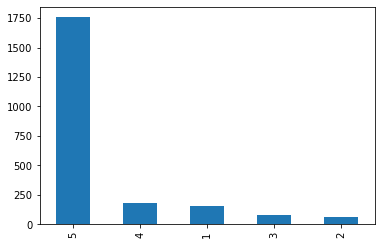

In [11]:
df['rating_stars'].value_counts().sort_values(ascending=False).plot.bar()


Most of the customers are satisfied.
WE have class imbalance.
If we build model it will biased for 5 ratings.

### 4.3 Let's analyze other features like year, month, and day etc.
#### Check value counts of 'year' and write your observations., Comment on the range of years, frequency of ratings in each year.

In [12]:
df['year'].value_counts().sort_index()

2014      13
2015    1006
2016     605
2017     370
2018     187
2019      46
Name: year, dtype: int64

In year 2015 we have received the most reviews
After 2015 this product's reputation got decreased

#### Check mean rating for each year and write your findings

In [13]:
df.groupby(by='year')['rating_stars'].mean()

year
2014   4.9230769
2015   4.4582505
2016   4.5900826
2017   4.5108108
2018   4.3475936
2019   4.3478261
Name: rating_stars, dtype: float64

In [14]:
pd.crosstab(df.year,df.rating_stars)

rating_stars   1   2   3    4    5
year                              
2014           0   0   0    1   12
2015          65  31  45  102  763
2016          37  10  17   36  505
2017          25  13   8   26  298
2018          22   4   5   12  144
2019           4   2   2    4   34

with time product's rating also dropped

#### Check value counts of 'month' and write your observations. Comment on the frequency of ratings and discuss if the rating count and mean rating is higher/low on certain months.

In [15]:
df['month'].value_counts().sort_index()

1     221
2     239
3     234
4     205
5     158
6     140
7     144
8     119
9     157
10    141
11    191
12    278
Name: month, dtype: int64

In [16]:
pd.crosstab(df.month,df.rating_stars)

rating_stars   1  2   3   4    5
month                           
1              6  7   8  18  182
2             20  9   6  23  181
3             12  3   9  16  194
4             17  6   8  17  157
5             13  5   4  12  124
6              5  7   3  15  110
7              4  1   4   7  128
8             10  0   5  12   92
9              5  6   9  16  121
10            14  7   4  13  103
11            18  3   6  10  154
12            29  6  11  22  210

At starting and ending of each year product received most reviews

### 4.4 Combine text features
#### Drop all the numerical features ['Unnamed: 0','date', 'year', 'month', 'day', 'ownership_pariod'] and ['rating_stars']

In [17]:
df_new=df.drop(['date', 'year', 'month', 'day', 'ownership_pariod'],axis=1)

#### Replace null values (NaN) with blanks

In [18]:
df_new.fillna('',inplace=True)
df_new

review_title  \
0                                                 solid   
1     nice drive for price even cheaper by todays costs   
2                                               perfect   
3                                           very snappy   
4                                        worth the hype   
5                                            good price   
6                                            ssd strong   
7                                               it died   
8                                         ssd s are meh   
9                                     good ssd for sata   
10                                         amzing price   
11                                       ssds overrated   
12                                              love it   
13                                        nothing lasts   
14                                            a1 seller   
15                                      very fast drive   
16                                             worth it   
17                                          bad product   
18                        almost 5 yrs smooth as grease   
19                                                 good   
20                                                great   
21                 excellent drive bas customer service   
22                     2 years later still going strong   
23                             this ssd changed my life   
24    excellent product amazing first ssd and loving...   
25        this is the only model i buy this and the 860   
26    amazing if you never owned an ssd before like ...   
27                                   4 years of service   
28                                   get something else   
29    been using as primary drive for 7 months with ...   
30                                            great ssd   
31                                          plug and go   
32                                  works as advertised   
33                                              it died   
34                       excellent vendor terrible usps   
35                 if i can give it zero rating i would   
36                             works great and reliable   
37                                         good product   
38                                   worth the money if   
39                           two years in still perfect   
40                                            no issues   
41                 beware you may be getting eu version   
42                                                        
43    if you want a good ssd from a reputable brand ...   
44                                                  wow   
45                    running for months without issues   
46    i m new to ssds but what an improvement in per...   
47                       samsung sdd s are an easy call   
48                                     met expectations   
49                                   nice and quick ssd   
50                     great ssd made a new laptop fast   
51     works good would have given five stars but price   
52                                         reliable ssd   
53    great product works great computer boots up fa...   
54                                                d o a   
55                     great ssd made a new laptop fast   
56                                            great ssd   
57                              died on me after a year   
58                                            great ssd   
59                                     good price benef   
60                                   very fast reliable   
61                    failure after less than two years   
62                                           super fast   
63                                              awesome   
64                                        six months in   
65                            best ssd brand hands down   
66                    sharing the link for the firmware   
67                             

#### Join all text items in a row that have a space in between and Add a new column (with the newly created combined reviews) to the dataframe.

In [19]:
df_new['combined_reviews'] = df_new[df_new.drop('rating_stars',axis=1).columns].apply(lambda x: ' '.join(x),axis=1)
df_new

review_title  \
0                                                 solid   
1     nice drive for price even cheaper by todays costs   
2                                               perfect   
3                                           very snappy   
4                                        worth the hype   
5                                            good price   
6                                            ssd strong   
7                                               it died   
8                                         ssd s are meh   
9                                     good ssd for sata   
10                                         amzing price   
11                                       ssds overrated   
12                                              love it   
13                                        nothing lasts   
14                                            a1 seller   
15                                      very fast drive   
16                                             worth it   
17                                          bad product   
18                        almost 5 yrs smooth as grease   
19                                                 good   
20                                                great   
21                 excellent drive bas customer service   
22                     2 years later still going strong   
23                             this ssd changed my life   
24    excellent product amazing first ssd and loving...   
25        this is the only model i buy this and the 860   
26    amazing if you never owned an ssd before like ...   
27                                   4 years of service   
28                                   get something else   
29    been using as primary drive for 7 months with ...   
30                                            great ssd   
31                                          plug and go   
32                                  works as advertised   
33                                              it died   
34                       excellent vendor terrible usps   
35                 if i can give it zero rating i would   
36                             works great and reliable   
37                                         good product   
38                                   worth the money if   
39                           two years in still perfect   
40                                            no issues   
41                 beware you may be getting eu version   
42                                                        
43    if you want a good ssd from a reputable brand ...   
44                                                  wow   
45                    running for months without issues   
46    i m new to ssds but what an improvement in per...   
47                       samsung sdd s are an easy call   
48                                     met expectations   
49                                   nice and quick ssd   
50                     great ssd made a new laptop fast   
51     works good would have given five stars but price   
52                                         reliable ssd   
53    great product works great computer boots up fa...   
54                                                d o a   
55                     great ssd made a new laptop fast   
56                                            great ssd   
57                              died on me after a year   
58                                            great ssd   
59                                     good price benef   
60                                   very fast reliable   
61                    failure after less than two years   
62                                           super fast   
63                                              awesome   
64                                        six months in   
65                            best ssd brand hands down   
66                    sharing the link for the firmware   
67                             

#### Check if there are any null values and drop NaN values if any

In [20]:
df_new.isna().sum()

review_title        0
overall_review      0
pros                0
cons                0
rating_stars        0
combined_reviews    0
dtype: int64

In [21]:
df_new.dropna(inplace=True)

#### Calculate the length of each review and add it to the dataframe

In [22]:
df_new['length']=df_new['combined_reviews'].apply(lambda x: len(x.split(' ')))
df_new

review_title  \
0                                                 solid   
1     nice drive for price even cheaper by todays costs   
2                                               perfect   
3                                           very snappy   
4                                        worth the hype   
5                                            good price   
6                                            ssd strong   
7                                               it died   
8                                         ssd s are meh   
9                                     good ssd for sata   
10                                         amzing price   
11                                       ssds overrated   
12                                              love it   
13                                        nothing lasts   
14                                            a1 seller   
15                                      very fast drive   
16                                             worth it   
17                                          bad product   
18                        almost 5 yrs smooth as grease   
19                                                 good   
20                                                great   
21                 excellent drive bas customer service   
22                     2 years later still going strong   
23                             this ssd changed my life   
24    excellent product amazing first ssd and loving...   
25        this is the only model i buy this and the 860   
26    amazing if you never owned an ssd before like ...   
27                                   4 years of service   
28                                   get something else   
29    been using as primary drive for 7 months with ...   
30                                            great ssd   
31                                          plug and go   
32                                  works as advertised   
33                                              it died   
34                       excellent vendor terrible usps   
35                 if i can give it zero rating i would   
36                             works great and reliable   
37                                         good product   
38                                   worth the money if   
39                           two years in still perfect   
40                                            no issues   
41                 beware you may be getting eu version   
42                                                        
43    if you want a good ssd from a reputable brand ...   
44                                                  wow   
45                    running for months without issues   
46    i m new to ssds but what an improvement in per...   
47                       samsung sdd s are an easy call   
48                                     met expectations   
49                                   nice and quick ssd   
50                     great ssd made a new laptop fast   
51     works good would have given five stars but price   
52                                         reliable ssd   
53    great product works great computer boots up fa...   
54                                                d o a   
55                     great ssd made a new laptop fast   
56                                            great ssd   
57                              died on me after a year   
58                                            great ssd   
59                                     good price benef   
60                                   very fast reliable   
61                    failure after less than two years   
62                                           super fast   
63                                              awesome   
64                                        six months in   
65                            best ssd brand hands down   
66                    sharing the link for the firmware   
67                             

#### Check summary stats of the length column

In [23]:
df_new['length'].describe()

count   2227.0000000
mean      84.8675348
std       87.4983350
min        4.0000000
25%       30.0000000
50%       59.0000000
75%      109.0000000
max     1615.0000000
Name: length, dtype: float64

### 4.5 Analyzing and preparing the text data


#### Set the max length of each review to 25 since it results in faster training (however, you are free to change this)
#### Set max_features to 10000 and embedding size to 50

In [24]:
max_features = 10000
maxlen = 25
embedding_size = 50

#### Tokenize the cobined text data. You can use the Tokenizer from tensorflow.keras.preprocessing.text. Check the number of samples post tokenization.

In [73]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer= Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(df_new['combined_reviews']))
X=tokenizer.texts_to_sequences(list(df_new['combined_reviews']))

In [77]:
X[0]

[232, 93, 6, 19, 54, 22, 829, 10, 248, 162, 16, 830, 550, 145, 7, 264, 126]

In [78]:
df_new['combined_reviews'].head(1)

0    solid buy it you will not regret this purchase...
Name: combined_reviews, dtype: object

#### Pad the above tokenized reviews data save it as independent features. Use max_len for the same.

In [79]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [80]:
X=pad_sequences(X,maxlen=maxlen)
y=np.asarray(df_new['rating_stars'])

#### Check the shape of X (padded tokenized review data) and y (rating_stars) data.

In [81]:
print(X.shape)

(2227, 25)


#### Check the total number of words in the dictionary (of tekenizer)

In [82]:
size_of_vocabulary=len(tokenizer.word_index) + 1 
print(size_of_vocabulary)

8839


### 4.6 Compute the glove embeddings. Use the provided txt file for the same.

#### Read the glove embeddings from the file provided titled ‘glove.6B.50d.txt’. And save it to a dictotionary having word and corresponding embedding vector.

In [112]:
embeddings_dict = {}

f = open('glove.6B.50d.txt',encoding='utf-8')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_dict[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_dict))

Loaded 400000 word vectors.


#### Create a weight matrix for words in the training docs

In [113]:
embedding_matrix = np.zeros((size_of_vocabulary, embedding_size))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [114]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41800001,  0.24968   , -0.41242   , ..., -0.18411   ,
        -0.11514   , -0.78580999],
       [ 0.11891   ,  0.15255   , -0.082073  , ..., -0.57511997,
        -0.26671001,  0.92120999],
       ...,
       [-0.38949001,  0.070842  ,  0.060221  , ..., -0.12498   ,
         0.21944   ,  0.18415   ],
       [-0.33673999,  0.44661999,  1.08659995, ..., -0.56177002,
        -0.28937   , -0.0086977 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

#### Check length of the embedding

In [115]:
len(embedding_matrix)

8839

### 4.7 Target Feature:- One hot encode the target variable (rating_stars)

In [116]:
from tensorflow.keras.utils import to_categorical

In [133]:
y_encoded=to_categorical(y-1,num_classes=5,dtype='uint')
y_encoded


array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint32)

### 4.8 Split the data into Train & Test sets

In [134]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,test_size=0.3,random_state=42,stratify=y)

In [135]:
y_train[0]

array([0, 0, 0, 0, 1], dtype=uint32)

## 5. Model building

### 5.1 Construct a neural network architecture using embedding and LSTM layers for building the rating prediction model.
- Use the num_words, embedding_size from the above tokenizer and embeddings respectively
- Use weights from the above embedding matrix
- Use input length as the maxlen
- Add LSTM layers

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,Flatten,LSTM,Dropout


In [137]:
model=Sequential()
e = Embedding(size_of_vocabulary, embedding_size, weights=[embedding_matrix], input_length=maxlen)
model.add(e)
model.add(LSTM(128,return_sequences=True))   
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))



In [138]:
y_encoded[0]

array([0, 0, 0, 0, 1], dtype=uint32)

### 5.2 Compile the model using appropriate loss, optimizer, and accuracy metric

In [139]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 25, 50)            441950    
_________________________________________________________________
lstm_5 (LSTM)                (None, 25, 128)           91648     
_________________________________________________________________
flatten_5 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               1638912   
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_28 (Dense)             (None, 64)               

### 5.3 Fit the model

In [140]:
batch_size = 100
epochs = 20

training_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))



Epoch 1/20
16/16 [==============================] - 6s 145ms/step - loss: 1.0564 - accuracy: 0.7240 - val_loss: 0.8022 - val_accuracy: 0.7892
Epoch 2/20
16/16 [==============================] - 2s 105ms/step - loss: 0.8316 - accuracy: 0.7882 - val_loss: 0.7244 - val_accuracy: 0.7892
Epoch 3/20
16/16 [==============================] - 1s 88ms/step - loss: 0.7411 - accuracy: 0.7875 - val_loss: 0.7104 - val_accuracy: 0.7892
Epoch 4/20
16/16 [==============================] - 1s 80ms/step - loss: 0.6766 - accuracy: 0.7882 - val_loss: 0.7128 - val_accuracy: 0.7892
Epoch 5/20
16/16 [==============================] - 1s 89ms/step - loss: 0.6427 - accuracy: 0.7837 - val_loss: 0.6909 - val_accuracy: 0.7907
Epoch 6/20
16/16 [==============================] - 1s 75ms/step - loss: 0.5718 - accuracy: 0.7940 - val_loss: 0.7543 - val_accuracy: 0.7922
Epoch 7/20
16/16 [==============================] - 1s 78ms/step - loss: 0.4976 - accuracy: 0.8177 - val_loss: 0.7917 - val_accuracy: 0.7713
Epoch 8/20


### 5.4 Predict ratings for test data and check accuracy and confusion matrix

In [141]:
predictions = model.predict(X_test.reshape(len(X_test),maxlen))

In [142]:
from numpy import argmax

y_test_inv = argmax(y_test, axis=-1).astype('int')
y_pred_inv = argmax(predictions, axis=-1).astype('int')


In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_inv, y_pred_inv)


0.7832585949177877

In [144]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_inv, y_pred_inv)

array([[ 15,   3,   2,   9,  17],
       [  3,   3,   1,   3,   8],
       [  5,   1,   2,   3,  12],
       [  1,   0,   2,   9,  42],
       [  4,   5,   3,  21, 495]], dtype=int64)

In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test_inv, y_pred_inv))


              precision    recall  f1-score   support

           0       0.54      0.33      0.41        46
           1       0.25      0.17      0.20        18
           2       0.20      0.09      0.12        23
           3       0.20      0.17      0.18        54
           4       0.86      0.94      0.90       528

    accuracy                           0.78       669
   macro avg       0.41      0.34      0.36       669
weighted avg       0.75      0.78      0.76       669



### 5.5 Display plot of training and validation loss/accuracy wrt to epochs

Text(0.5, 1.0, 'Training and validation loss')

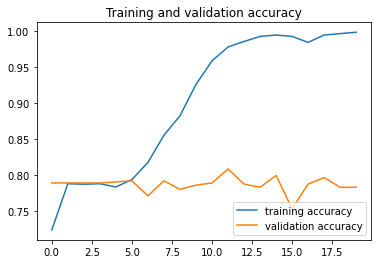

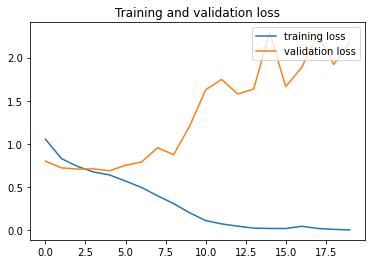

In [146]:
import matplotlib.pyplot as plt
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )


## 6. Conclusion and Interpretation

model is over fit
imbalanced class problem – model rightly predicts only for ratings 5 but not for others
more data is required
Number of neurons needs to be tweaked

## 7. Food for thought:

1.) Change activation function (try leaky_relu or tanh) and see if it helps in improving model performance with the dataset that is highly imbalanced

2.) Try with only the overall review feature and see if it leads to improvement in model performace

3.) Change the hyperparameters of the model and compare the results 